In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# print x,y,z of central pixel 

# Read image files
image_dir = "./2018-04-20-10-04-11/kinect/color"
files = os.listdir(image_dir)
image_extensions = ['.png']

for file in files : 
    if os.path.splitext(file)[-1].lower() in image_extensions: # why -1 : the last component of tuple
        image_path = os.path.join(image_dir,file)
        img = cv2.imread(image_path)

        height, width = img.shape[:2] # only height and width

        center_x = width//2
        center_y = width//2

        center_pixel_value = img[center_y, center_x]
        print("center pixel value : ", center_pixel_value)
        # numpy -> np.load : bakcground depth image + standing person -> outline of person
        # array1-array2 ; vectorization = dont need to do whole for loop

center pixel value :  [37 44 43]
center pixel value :  [ 95 108 106]
center pixel value :  [119 129 129]
center pixel value :  [140 148 147]
center pixel value :  [125 135 135]
center pixel value :  [126 133 132]
center pixel value :  [ 82 123 178]
center pixel value :  [118 126 125]
center pixel value :  [114 123 122]
center pixel value :  [132 140 139]
center pixel value :  [121 133 133]
center pixel value :  [134 141 139]
center pixel value :  [ 56  81 118]
center pixel value :  [124 136 134]
center pixel value :  [108 115 114]
center pixel value :  [129 135 134]
center pixel value :  [ 73 110 166]
center pixel value :  [116 126 125]
center pixel value :  [108 145 197]
center pixel value :  [103 143 197]
center pixel value :  [137 143 142]
center pixel value :  [ 66  93 133]
center pixel value :  [110 134 180]
center pixel value :  [131 138 137]
center pixel value :  [139 145 144]
center pixel value :  [124 138 135]
center pixel value :  [ 95 104 103]
center pixel value :  [24 30 29

In [6]:
data = np.load('/Users/sojeonglee/CVL_practice/2018-04-20-10-04-11/kinect/depth/1524211452432110513.npy')
print(data[:10, :10])  # 처음 10개 행과 열만 출력

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


uint16
0 11192


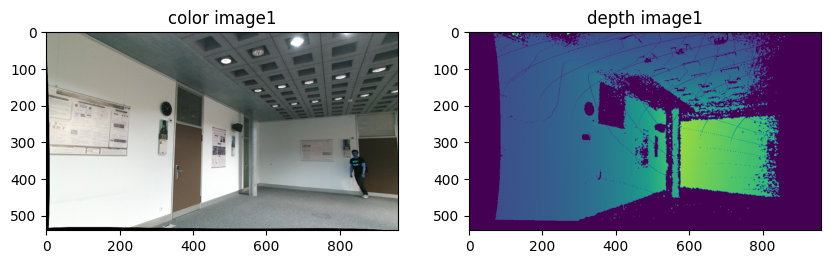

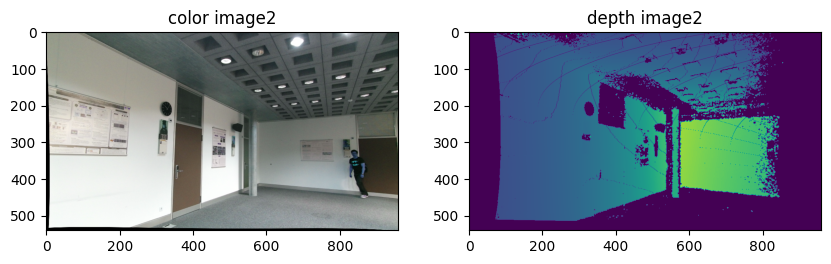

In [7]:
# display images
# color image right next to depth img
# use matplolib subplot    

#load route 
color_image1 = cv2.imread('2018-04-20-10-04-11/kinect/color/1524211452545791624.png')
color_image2 = cv2.imread('2018-04-20-10-04-11/kinect/color/1524211452606606063.png')

depth_image1 = np.load('2018-04-20-10-04-11/kinect/depth/1524211452432110513.npy')
depth_image2 = np.load('2018-04-20-10-04-11/kinect/depth/1524211452465143660.npy')

print(depth_image1.dtype)
print(np.amin(depth_image1),np.amax(depth_image2))

plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.imshow(color_image1)
plt.title('color image1')

plt.subplot(1,2,2)
plt.imshow(depth_image1)
plt.title('depth image1')
plt.show()

plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.imshow(color_image2)
plt.title('color image2')

plt.subplot(1,2,2)
plt.imshow(depth_image2)
plt.title('depth image2')
plt.show()



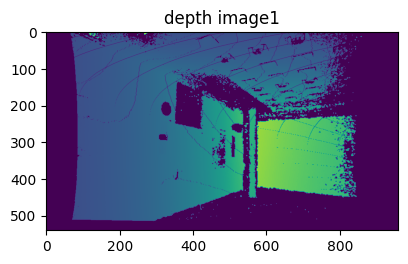

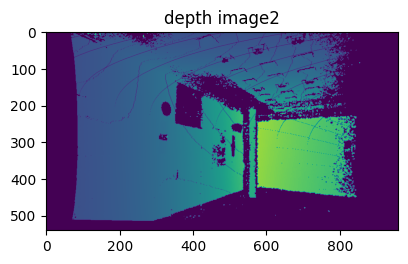

In [8]:
# numpy -> np.load : bakcground depth image + standing person -> outline of person
# array1-array2 ; vectorization = dont need to do whole for loop

# read depth image
depth_image1 = np.load('2018-04-20-10-04-11/kinect/depth/1524211452432110513.npy')
depth_image2 = np.load('2018-04-20-10-04-11/kinect/depth/1524211452465143660.npy')

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.imshow(depth_image1)
plt.title('depth image1')
plt.show()

plt.figure(figsize=(10,7))
plt.subplot(1,2,2)
plt.imshow(depth_image2)
plt.title('depth image2')
plt.show()

In [9]:
# In general, figure exists more far than background, so you can choose pixels which has depth value over threshold. 
# cv2.threshold() : you can binarize depth image -> and seperate figure
# cv2.findContours() : you can find outline of figure and extract figure out of the picture.

image = cv2.imread('2018-04-20-10-04-11/kinect/color/1524211452545791624.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('.', image)

# binarize
ret, thresh = cv2.threshold(image, 127,255,cv2.THRESH_BINARY)

# contouring
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_with_contours = cv2.drawContours(image, contours, -1, (0,255,0), 2)

cv2.imshow('image with contours', image_with_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'diff' is not defined

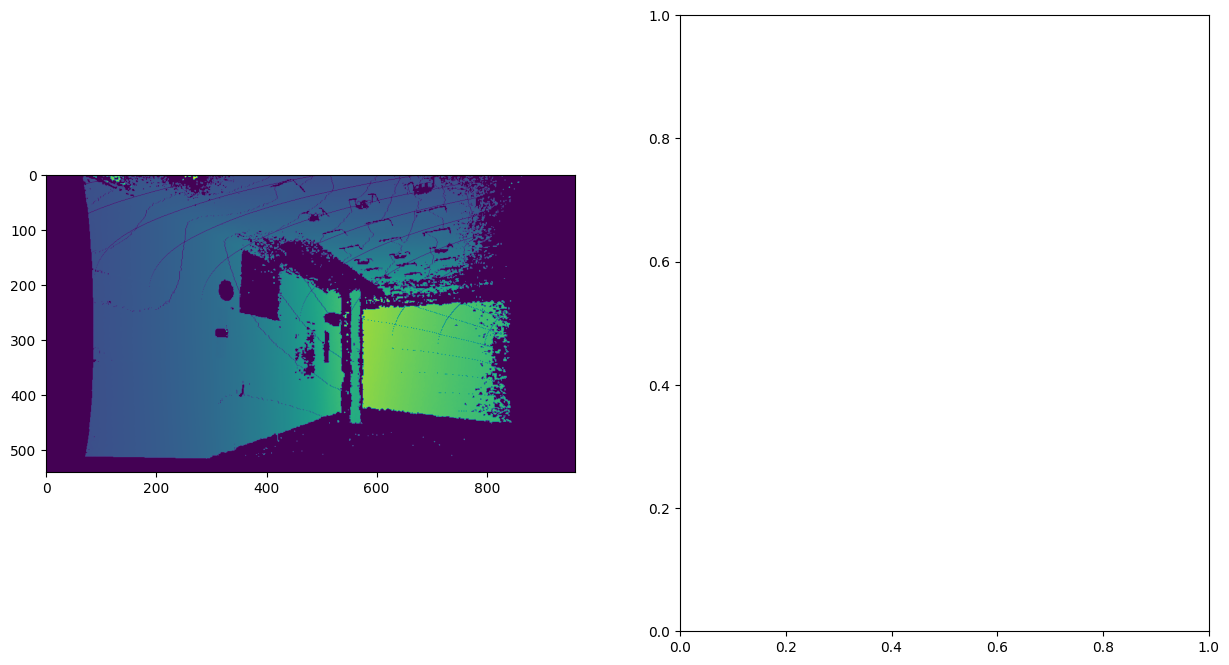

In [16]:
color_image1 = cv2.imread('2018-04-20-10-04-11/kinect/color/1524211452545791624.png')
color_image2 = cv2.imread('2018-04-20-10-04-11/kinect/color/1524211452606606063.png')

depth_image1 = np.load('2018-04-20-10-04-11/kinect/depth/1524211452432110513.npy').astype(np.int64) # background
depth_image2 = np.load('2018-04-20-10-04-11/kinect/depth/1524211484410027189.npy').astype(np.int64)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(depth_image1)

plt.subplot(1,2,2)
plt.imshow(diff)
plt.imshow(depth_image2)


#diff = depth_image2 - depth_image1

#print(np.amax(diff))

#import matplotlib.pyplot as plt
#plt.imshow(diff);plt.show()

11139


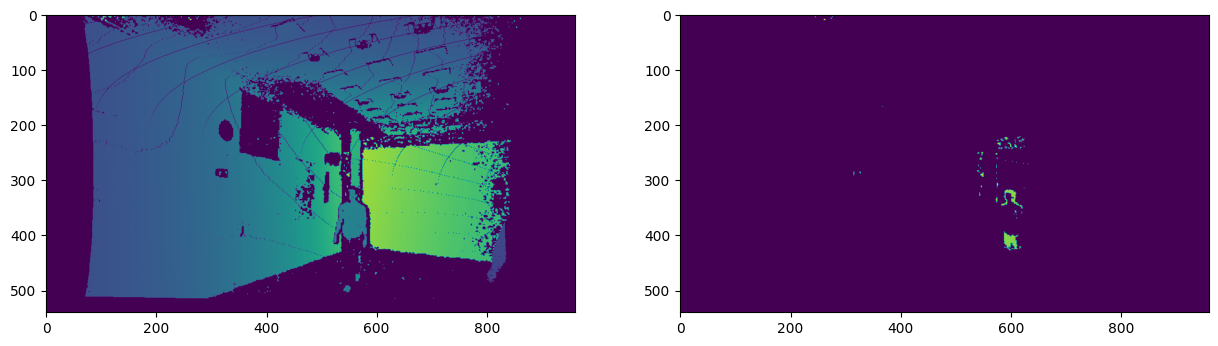

In [3]:
# how to get ouline of person?
# found two photos which have big difference especially the shape of person

# 2018-04-20-10-04-11/kinect/color/1524211455879191910.png -> no person
# 2018-04-20-10-04-11/kinect/color/1524211456141333067.png -> person 

depth1 = np.load('2018-04-20-10-04-11/kinect/depth/1524211455737017041.npy').astype(np.int64)
depth2 = np.load('2018-04-20-10-04-11/kinect/depth/1524211456408511802.npy').astype(np.int64)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(depth2)

diff = depth2 - depth1
# color2[np.where(diff<1000)] *= 0
diff[np.where(diff < 9000)] = 0

print(np.amax(diff))

plt.subplot(1,2,2)
plt.imshow(diff)
plt.show()

#import matplotlib.pyplot as plt
#plt.imshow(diff);plt.show()

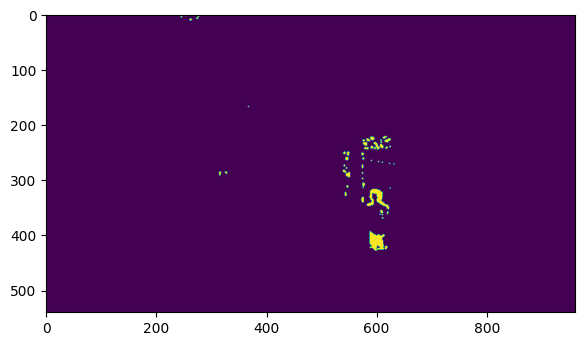

In [20]:
# now it's time to get contour!

# get as image file
cv2.imwrite('diff_image.jpg', diff)

contour_image = cv2.imread('diff_image.jpg', cv2.IMREAD_GRAYSCALE)
# cv2.imshow('.', contour_image)

# binarize
ret, thresh = cv2.threshold(contour_image, 127,255,cv2.THRESH_BINARY)

# contouring
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_with_contours = cv2.drawContours(contour_image, contours, -1, (255,0,255), 2)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(image_with_contours)


# cv2.imshow('image with contours', image_with_contours)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

connected components 2


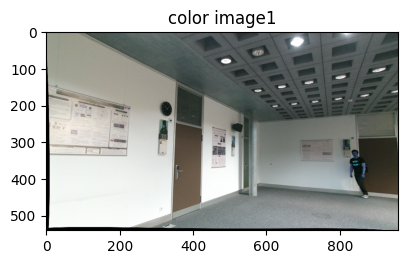

: 

In [12]:
# new hw

# get bounding box
# cv2 algo : connecting components !!!
# group the pixels -> person or noise

# ---------
# 1) get image
color_image1 = cv2.imread('2018-04-20-10-04-11/kinect/color/1524211452545791624.png')
plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.imshow(color_image1)
plt.title('color image1')

# 2) Connected Component Labeling w/ cv2.connectedComponents()
num_labels, labels = cv2.connectedComponents(gray_image, connectivity=8, ltype=cv2.CV_32S)

if num_labels < 2:
    print("There is no connected components")
else:
    print("connected components", num_labels)

# 3) object classification with characteristic of human
# 4) Drawing Bounding Boxes w/ cv2.rectangle()

min_area = 1000  # 최소 객체 면적
max_area = 10000  # 최대 객체 면적

for label in range(1, num_labels):
    # 각 객체에 대한 마스크 생성
    mask = (labels == label).astype('uint8')

    # 객체의 경계 상자 계산
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(contour)

        # 객체의 높이와 너비 계산
        area = cv2.contourArea(contour)

        # 사람으로 추정되는 객체일 경우 바운딩 박스 그리기
        if min_area < area < max_area and 0.5 < w / h < 2.0:
            gray_image = cv2.rectangle(color_image1, (x, y), (x + w, y + h), (0, 255, 0), 5)

# 결과 출력
plt.imshow(color_image1) #plt.imshow 
plt.show()
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# matplotlib - rgb , opencv bgr
# on color image
# diff - depth image

In [ ]:
# I faced some problem, so got advice from my advisor professor

# Sure, I’d love to answer your question.
# The goal is to use the depth image to process the bounding box, 
# but plot it on the color image. Don’t use the `findContours` code. What we need is the bounding box, which is generated if you use `connectedComponentsWithStats`. One of the things that returns is a bounding box and area.
 
#Here is the flow I would use:
#Take the difference between the background depth image and the current depth image.
#Change that result to be binary, everything that is above a certain threshold is 1, everything else is 0 (use cv.threshold)
#Run that through cv.connectedComponentsWithStats() to get all groups of pixels.
#One of those outputs is called stats, it contains a Nx5 matrix. The 5th column contains the area of each group of pixels. Keep any group is that has an area larger than a certain size (let’s start with 20 pixels)
#For all kept groups, draw the bounding box, which is the stats columns 1-4. Use cv2.rectangle to draw it on the color image.

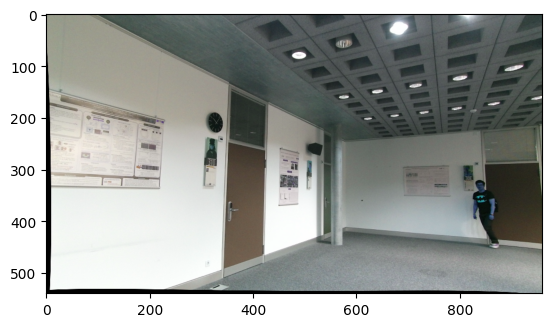

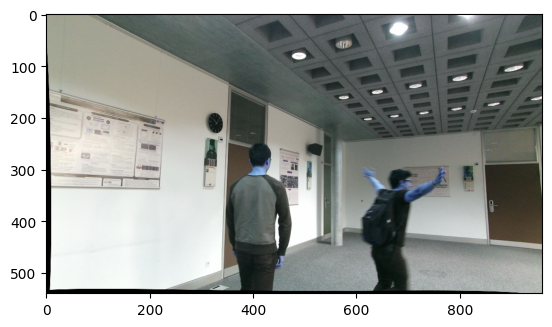

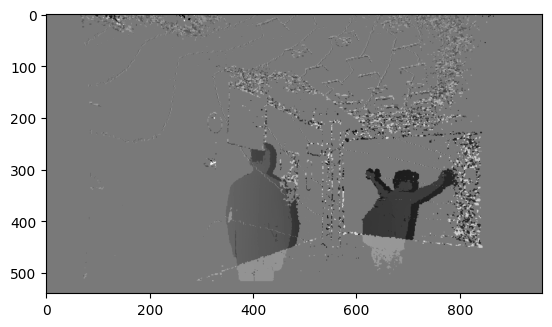

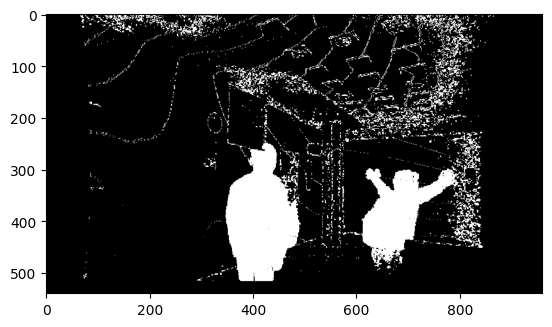

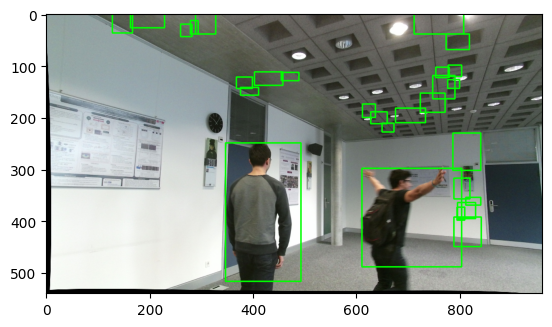

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#2018-04-20-10-04-11/kinect/color/1524211455879191910.png
#2018-04-20-10-04-11/kinect/color/1524211456871347376.png

# step1 : load images and take the difference between depth images
c1 = cv2.imread('2018-04-20-10-04-11/kinect/color/1524211452545791624.png')
c2 = cv2.imread('2018-04-20-10-04-11/kinect/color/1524211477139484216.png')

d1 = np.load('2018-04-20-10-04-11/kinect/depth/1524211452545791624.npy').astype(np.int64) # background
d2 = np.load('2018-04-20-10-04-11/kinect/depth/1524211477139484216.npy').astype(np.int64)

plt.imshow(c1);plt.show()
plt.imshow(c2);plt.show()

difference = d2 - d1

plt.imshow(difference, cmap="gray")
plt.show()

# Normalize the difference image to range [0, 255]
normalized_diff = cv2.normalize(np.abs(difference), None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Step 2: Binarize
_, im_th = cv2.threshold(normalized_diff, 30, 255, cv2.THRESH_BINARY)

plt.imshow(im_th, cmap="gray")
plt.show()

# Step 3: Get all group of pixels using cv.connectedComponentsWithStats()
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(im_th)

# Step 4: Filter out small areas and draw bounding boxes
threshold = 100
# Iterate through stats to filter out small areas and draw bounding boxes
for i in range(1, num_labels): # num_labels : connected number of labels
    area = stats[i, cv2.CC_STAT_AREA] # stats[i, cv2.CC_STAT_AREA]is the number of pixels(area) of ith label(group)
    if area > threshold:
        x, y, w, h = stats[i, cv2.CC_STAT_LEFT], stats[i, cv2.CC_STAT_TOP], stats[i, cv2.CC_STAT_WIDTH], stats[i, cv2.CC_STAT_HEIGHT]
        cv2.rectangle(c2, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw bounding box on color image

# Display the result
plt.imshow(cv2.cvtColor(c2, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for proper display with matplotlib
plt.show()


In [ ]:
# new hw!
# the problem is the square box which marks non-human things. also sparkles around person (aka salt and pepper noise)

# solution is "morphology" : processing noise in image
# pixel who doesn't have white neighbor : noise
# pixel who is close to balck line ; saved 

# use functions below :
# cv.erode
# cv.dilate

# not really recommended function :
# cv.close (x) 
# cv.open (x)

In [ ]:
# reference : https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
# erosion
# The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object 
# (Always try to keep foreground in white)
# A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

# dilation
# It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. 
# So it increases the white region in the image or size of foreground object increases

# opening 
# Opening is just another name of erosion followed by dilation. 
# It is useful in removing noise, as we explained above. Here we use the function, cv2.morphologyEx()

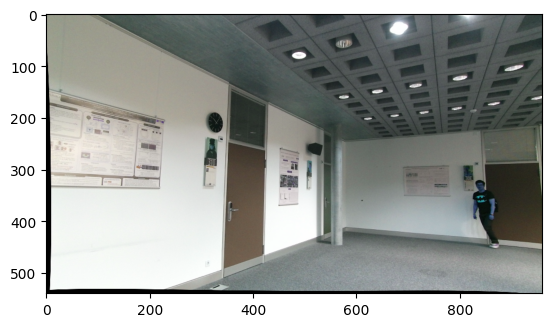

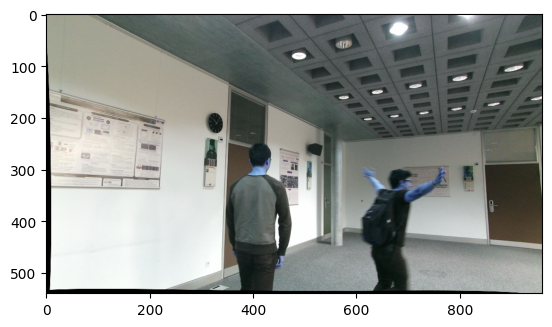

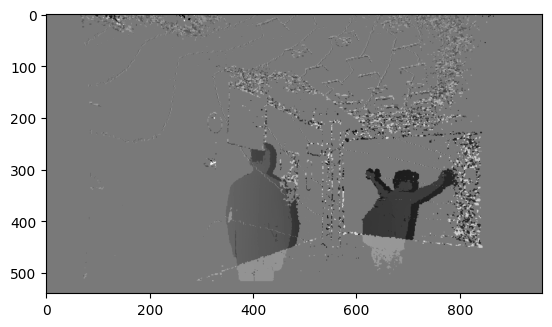

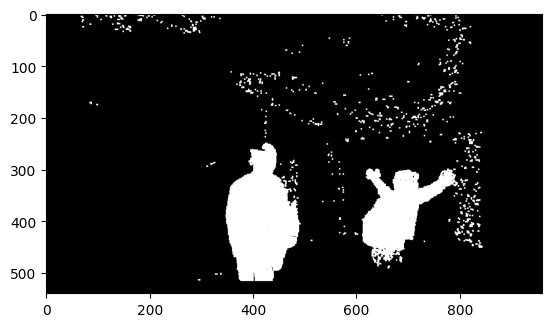

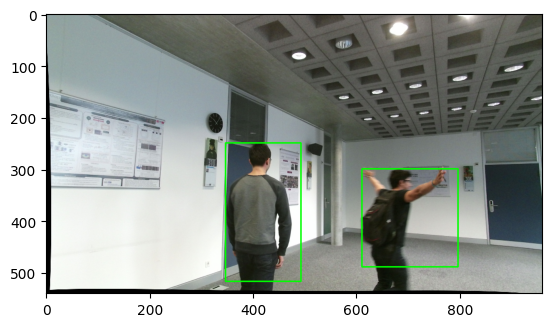

In [29]:
# using cv2.morphologyEx()
import cv2
import numpy as np
import matplotlib.pyplot as plt

#2018-04-20-10-04-11/kinect/color/1524211455879191910.png
#2018-04-20-10-04-11/kinect/color/1524211456871347376.png

# step1 : load images and take the difference between depth images
c1 = cv2.imread('2018-04-20-10-04-11/kinect/color/1524211452545791624.png')
c2 = cv2.imread('2018-04-20-10-04-11/kinect/color/1524211477139484216.png')

d1 = np.load('2018-04-20-10-04-11/kinect/depth/1524211452545791624.npy').astype(np.int64) # background
d2 = np.load('2018-04-20-10-04-11/kinect/depth/1524211477139484216.npy').astype(np.int64)

plt.imshow(c1);plt.show()
plt.imshow(c2);plt.show()

difference = d2 - d1

plt.imshow(difference, cmap="gray")
plt.show()

# Normalize the difference image to range [0, 255]
normalized_diff = cv2.normalize(np.abs(difference), None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Step 2: Binarize
_, im_th = cv2.threshold(normalized_diff, 30, 255, cv2.THRESH_BINARY)

# Step 2-1 : remove noise
kernel = np.ones((3, 3), np.uint8) 
im_cleaned = cv2.morphologyEx(im_th, cv2.MORPH_OPEN, kernel)

plt.imshow(im_th, cmap="gray")
plt.imshow(im_cleaned, cmap="gray")
plt.show()

# Step 3: Get all group of pixels using cv.connectedComponentsWithStats()
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(im_cleaned)

# Step 4: Filter out small areas and draw bounding boxes
threshold = 100
# Iterate through stats to filter out small areas and draw bounding boxes
for i in range(1, num_labels): # num_labels : connected number of labels
    area = stats[i, cv2.CC_STAT_AREA] # stats[i, cv2.CC_STAT_AREA]is the number of pixels(area) of ith label(group)
    if area > threshold:
        x, y, w, h = stats[i, cv2.CC_STAT_LEFT], stats[i, cv2.CC_STAT_TOP], stats[i, cv2.CC_STAT_WIDTH], stats[i, cv2.CC_STAT_HEIGHT]
        cv2.rectangle(c2, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw bounding box on color image

# Display the result
plt.imshow(cv2.cvtColor(c2, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for proper display with matplotlib
plt.show()


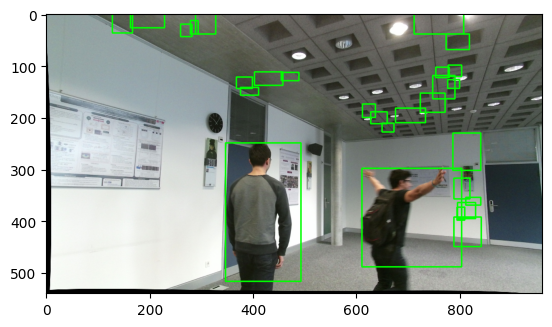

In [14]:
# reference : https://www.geeksforgeeks.org/erosion-dilation-images-using-opencv-python/
import numpy as np
import matplotlib.pyplot as plt

#2018-04-20-10-04-11/kinect/color/1524211455879191910.png
#2018-04-20-10-04-11/kinect/color/1524211456871347376.png

# step1 : load images and take the difference between depth images
c1 = cv2.imread('2018-04-20-10-04-11/kinect/color/1524211452545791624.png')
c2 = cv2.imread('2018-04-20-10-04-11/kinect/color/1524211477139484216.png')

d1 = np.load('2018-04-20-10-04-11/kinect/depth/1524211452545791624.npy').astype(np.int64) # background
d2 = np.load('2018-04-20-10-04-11/kinect/depth/1524211477139484216.npy').astype(np.int64)

plt.imshow(c1);plt.show()
plt.imshow(c2);plt.show()

difference = d2 - d1

plt.imshow(difference, cmap="gray")
plt.show()

# Normalize the difference image to range [0, 255]
normalized_diff = cv2.normalize(np.abs(difference), None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Step 2: Binarize
_, im_th = cv2.threshold(normalized_diff, 30, 255, cv2.THRESH_BINARY)

# Taking a matrix of size 5 as the kernel 
# gernerate 5*5 array filled with 1
kernel = np.ones((5, 5), np.uint8) 

# The first parameter is the original image, 
# kernel is the matrix with which image is convolved and 
# third parameter is the number of iterations, which will determine how much you want to erode/dilate a given image. 
img_erosion = cv2.erode(c2, kernel, iterations=100) 
img_dilation = cv2.dilate(c2, kernel, iterations=100) 

plt.imshow(im_th, cmap="gray")
plt.show()

# Step 3: Get all group of pixels using cv.connectedComponentsWithStats()
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(im_cleaned)

# Step 3-1 : get rid of noise 
# Taking a matrix of size 5 as the kernel 
# gernerate 5*5 array filled with 1
#kernel = np.ones((3, 3), np.uint8) 
#im_cleaned = cv2.morphologyEx(im_th, cv2.MORPH_OPEN, kernel)

# The first parameter is the original image, 
# kernel is the matrix with which image is convolved and 
# third parameter is the number of iterations, which will determine how much you want to erode/dilate a given image. 
#img_erosion = cv2.erode(im_th, kernel, iterations=1) 
#img_dilation = cv2.dilate(im_th, kernel, iterations=1) 

# Step 4: Filter out small areas and draw bounding boxes
threshold = 100
# Iterate through stats to filter out small areas and draw bounding boxes
for i in range(1, num_labels): # num_labels : connected number of labels
    area = stats[i, cv2.CC_STAT_AREA] # stats[i, cv2.CC_STAT_AREA]is the number of pixels(area) of ith label(group)
    if area > threshold:
        x, y, w, h = stats[i, cv2.CC_STAT_LEFT], stats[i, cv2.CC_STAT_TOP], stats[i, cv2.CC_STAT_WIDTH], stats[i, cv2.CC_STAT_HEIGHT]
        cv2.rectangle(c2, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw bounding box on color image

# Display the result
plt.imshow(cv2.cvtColor(c2, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for proper display with matplotlib
plt.show()

